<h1> IMDB Sentiment Analysis <h1>

<img src='https://expertsystem.com/wp-content/uploads/2019/06/Sentiment-analysis-e1566481971615.jpg' width= '800' align="center">

<h2> You seize sentiment better when you get clear of nature. You breathe it in every sense! - Jules Verne<h2>

In [1]:
#loading packages
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import SpatialDropout1D

<h2> Hyperparameters <h2>

In [2]:
output_dir = 'model_output/conv'

#training
epochs = 4
batch_size = 128

#vector-space
n_dim = 64
n_unique_words = 5000
max_review_length = 400
pad_type = trunc_type = 'pre'
drop_embed = 0.2

#convolutional
n_conv = 256
k_conv = 3

#dense
n_dense = 256
dropout = 0.2

<h2> Load Data <h2>

In [3]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

In [4]:
x_train = pad_sequences(x_train, maxlen = max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen = max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [5]:
def plt_dynamic(x,vy,ty,ax,colors=['b']):
  ax.plot(x,vy,'b',label='Validation Loss')
  ax.plot(x,ty,'r',label='Train Loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

<h2> Convolutional Network <h2>

In [26]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))

model.add(Conv1D(n_conv, k_conv, activation = 'relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))

model.add(Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 64)           320000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 398, 256)          49408     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [28]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [29]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 26s 134ms/step - loss: 0.4988 - accuracy: 0.7408 - val_loss: 0.3142 - val_accuracy: 0.8648
Epoch 2/4
196/196 [==============================] - 27s 136ms/step - loss: 0.2560 - accuracy: 0.8944 - val_loss: 0.2603 - val_accuracy: 0.8933
Epoch 3/4
196/196 [==============================] - 27s 138ms/step - loss: 0.1737 - accuracy: 0.9342 - val_loss: 0.2794 - val_accuracy: 0.8883
Epoch 4/4
196/196 [==============================] - 27s 139ms/step - loss: 0.1183 - accuracy: 0.9593 - val_loss: 0.2923 - val_accuracy: 0.8908


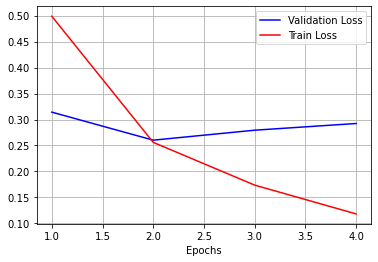

In [30]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epochs')

x=list(range(1,epochs+1))

vy=history.history['val_loss']
ty=history.history['loss']
plt_dynamic(x,vy,ty,ax)

In [31]:
model.load_weights(output_dir+"/weights.02.hdf5")

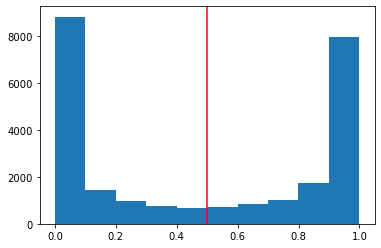

In [33]:
plt.hist(y_hat)
_=plt.axvline(x=0.5,color='red')

In [32]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0
'{:0.2f}'.format(pct_auc)

'96.00'

Coded while working through the following book: Krohn, J., Beyleveld, G., & Bassens, A. (2019). Deep Learning Illustrated: A Visual, Interactive Guide to Artificial Intelligence. Addison-Wesley Professional.